In [71]:
# %pip install rasterio
# %pip install geopandas
# %pip install fiona
# %pip install earthpy


import numpy as np
import numpy.ma as ma
#from matplotlib import pyplot as plt
import rasterio
import geopandas as gpd
#import rasterstats as rs
#from IPython.display import display
import pandas as pd
import os
import fiona
import rasterio.mask
#import matplotlib.pyplot as plt
import warnings
import rasterio
import rasterio.features
warnings.filterwarnings('ignore') #don't display warnings
from rasterio.mask import mask
#import earthpy.plot as ep
import cv2
import datetime

In [72]:
# from google.colab import drive
# drive.mount('/content/drive')

In [73]:
root_file = 'I:\\My Drive\\UAS_Beans\\Beans_StandCount\\2022\\SVREC\\ByStep'
shp_file = "6_10_22_SVREC_Plots_7m_final.shp"
img_dir= 'C:\\Users\\leoag\\Michigan State University\\MSU Dry Bean Breeding Lab - General\\UAS_Beans\\2022\\SVREC\\Pix4D_projects_RGB\\6_10_22_SVREC_RGB_7m\\3_dsm_ortho\\2_mosaic'
shp_dir = f"{root_file}/"'k._TestingModel\\6_10_22_SVREC_RGB_7m\\Shapefile'
plot_dir = f"{root_file}/"'k._TestingModel\\6_10_22_SVREC_RGB_7m\\Plots_Clip'


#os.chdir('/content/drive/MyDrive/temp_roi')

#plots_img = '/plots_img'

try:
    os.mkdir(plot_dir)
except:
  pass

os.chdir(plot_dir)
# # Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

plots = gpd.read_file(f'{shp_dir}' f'/{shp_file}')

plots_names=list(plots.columns.values)
print(plots_names)

Current working directory: I:\My Drive\UAS_Beans\Beans_StandCount\2022\SVREC\ByStep\k._TestingModel\6_10_22_SVREC_RGB_7m\Plots_Clip
['fid_1', 'PlotID', 'Global_ID', 'Plot', 'ENTRY', 'REP', 'IBLK', 'Rng', 'Pas', 'Name', 'Identity1', 'Pedigree', 'Experiment', 'Origin', 'Selection', 'Descriptio', 'Year', 'Location', 'Planter', 'Harvester', 'StandCount', 'BUFF_DIST', 'ORIG_FID', 'geometry']


In [74]:
shp_file_info=fiona.open(f'{shp_dir}/'f'{shp_file}', "r") 
#first feature of the shapefile
shp_file_inf = shp_file_info.next()
print(shp_file_inf)

plot_num_field_name = "Global_ID"

{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('fid_1', 1.0), ('PlotID', '264'), ('Global_ID', '2202_4030'), ('Plot', '4030'), ('ENTRY', '20'), ('REP', '4'), ('IBLK', '6'), ('Rng', '12'), ('Pas', '24'), ('Name', 'N21510'), ('Identity1', None), ('Pedigree', 'N15306/N14229'), ('Experiment', '2202'), ('Origin', '18N118-02-02'), ('Selection', '20T2079'), ('Descriptio', '18A0118-18L116-18-19T75-19T1037-20T2079'), ('Year', '2022'), ('Location', 'SVREC'), ('Planter', '301'), ('Harvester', '1969'), ('StandCount', None), ('BUFF_DIST', -0.05), ('ORIG_FID', 0)]), 'geometry': {'type': 'Polygon', 'coordinates': [[(281587.71655961685, 4808617.627681468), (281587.7096586609, 4808617.627499519), (281582.31449125614, 4808617.709446654), (281582.30452856235, 4808617.710300954), (281582.29694237746, 4808617.712181065), (281582.2897446798, 4808617.715227064), (281582.2831134163, 4808617.719363639), (281582.27721250337, 4808617.724488543), (281582.2721878914, 4808617.73047502), (281582.26816374

In [75]:
img_list = os.listdir(img_dir)
img_list = [v for v in img_list if v.endswith('.tif')]
print(img_list)

['6_10_22_SVREC_RGB_7m_transparent_mosaic_group1.tif']


In [76]:
# Create an empty list to store the img names
img_list_names = []

for l in range(len(img_list)):
    print(l)
    img_list_names.append(str(img_list[l]))

print(img_list_names)

0
['6_10_22_SVREC_RGB_7m_transparent_mosaic_group1.tif']


In [77]:
# dataset = rasterio.open('C:\\Users\\leoag\\Michigan State University\\MSU Dry Bean Breeding Lab - General\\UAS_Beans\\2022\\SVREC\\Pix4D_projects_RGB\\6_13_22_SVREC_RGB_10m\\3_dsm_ortho\\2_mosaic\\6_13_22_SVREC_RGB_10m_transparent_mosaic_group1.tif')
# dataset.crs

In [78]:
# dataset.count

In [79]:
for tiffile in img_list_names:
    print(tiffile)

    with fiona.open(f'{shp_dir}/'f'{shp_file}', "r") as shapefile:
    
        for feature in shapefile:
    
            shape = [feature["geometry"]]
            
            Plot_ID = feature["properties"][plot_num_field_name]
                        
           # Change the current working directory
            os.chdir(img_dir)
            
            with rasterio.open(tiffile, "r") as ras:
                out_image, out_transform = mask(ras, shape, crop=True, nodata=0)
                out_meta = ras.meta
                
                out_image = ma.masked_where(out_image == 0, out_image)
                out_image = ma.filled(out_image.astype(float), np.nan)
                
              # Change the current working directory
                os.chdir(f'{plot_dir}')

                new_img_name = Plot_ID + '_' +  "7m" + '.png'
                print(new_img_name)  

                out_meta.update({"driver": "PNG",
                 "height": 640,       #out_image.shape[1],
                 "width": 3872,        #out_image.shape[2],
                 'count': 4,
                 "transform": out_transform})
                
                with rasterio.open(new_img_name, "w", **out_meta) as dest:
                    dest.write(out_image)

6_10_22_SVREC_RGB_7m_transparent_mosaic_group1.tif
2202_4030_7m.png
2202_4029_7m.png
2202_4028_7m.png
2202_4027_7m.png
2202_4026_7m.png
2202_3030_7m.png
2202_3029_7m.png
2202_3028_7m.png
2202_3027_7m.png
2202_3026_7m.png
2201_4036_7m.png
2201_4035_7m.png
2201_4034_7m.png
2201_4033_7m.png
2201_4032_7m.png
2201_4031_7m.png
2201_3036_7m.png
2201_3035_7m.png
2201_3034_7m.png
2201_3033_7m.png
2201_3032_7m.png
2201_3031_7m.png
2201_3025_7m.png
2201_3026_7m.png
2201_3027_7m.png
2201_3028_7m.png
2201_3029_7m.png
2201_3030_7m.png
2201_4025_7m.png
2201_4026_7m.png
2201_4027_7m.png
2201_4028_7m.png
2201_4029_7m.png
2201_4030_7m.png
2202_3021_7m.png
2202_3022_7m.png
2202_3023_7m.png
2202_3024_7m.png
2202_3025_7m.png
2202_4021_7m.png
2202_4022_7m.png
2202_4023_7m.png
2202_4024_7m.png
2202_4025_7m.png
2202_4020_7m.png
2202_4019_7m.png
2202_4018_7m.png
2202_4017_7m.png
2202_4016_7m.png
2202_3020_7m.png
2202_3019_7m.png
2202_3018_7m.png
2202_3017_7m.png
2202_3016_7m.png
2201_4024_7m.png
2201_4023_7m.p

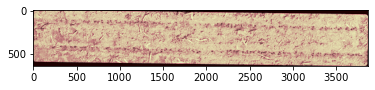

In [68]:
#plotting
from matplotlib import pyplot
with rasterio.open(new_img_name) as src:
    pyplot.imshow(src.read(1), cmap='pink')
    pyplot.show()